In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
import scipy.linalg as LA
from scipy.signal import dlsim, butter, lfilter

In [2]:
plt.style.use('science')
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Computer Modern",
    "font.size": 11,
    "figure.figsize": (6,6),
})

In [7]:
def low_pass_filter(signal, cutoff, fs):
    '''
    A fifth-order Butterworth low-pass filter.
    '''
    nyquist = 0.5 * fs
    normalized_cutoff = cutoff / nyquist
    b, a = butter(5, normalized_cutoff, btype='low', analog=False)
    filtered_signal = lfilter(b, a, signal)

    return filtered_signal

In [11]:
def process_baseline_data(rot, case, cut, plot=False, pickle_data=False):
    sensor_data = np.loadtxt(
        (str(rot)).join(("../data/gear_loss/sensor/", case)),
        delimiter=",",
        skiprows=1
    )

    s, e = cut

    time_raw = sensor_data[s:e,0]
    time = time_raw-time_raw[0]

    enc2_angle = (sensor_data[s:e,3])*(2*np.pi/360)
    enc2_time_raw = sensor_data[s:e,4]
    enc2_time = enc2_time_raw - enc2_time_raw[0]
    enc4_angle = (sensor_data[s:e,7])*(2*np.pi/360)
    enc4_time_raw = sensor_data[s:e,8]
    enc4_time = enc4_time_raw - enc4_time_raw[0]

    speed2 = np.gradient(enc2_angle, enc2_time)
    speed4 = np.gradient(enc4_angle, enc4_time)

    # torque sensors mixed up
    torque2 = sensor_data[s:e,-2]
    torque1 = sensor_data[s:e,-1]
    
    if plot:
        plt.subplot(221)
        plt.plot(time, speed2)
        plt.subplot(222)
        plt.plot(time, speed4)
        plt.subplot(223)
        plt.plot(time, torque1)
        plt.subplot(224)
        plt.plot(time, torque2)

    speed2 = low_pass_filter(speed2, 500, 3012)
    speed4 = low_pass_filter(speed4, 500, 3012)
    torque1 = low_pass_filter(torque1, 500, 3012)
    torque2 = low_pass_filter(torque2, 500, 3012)

    motor_shaft_power = torque1*speed2
    prop_shaft_power = torque2*speed4
    power_loss = motor_shaft_power-prop_shaft_power

    damping = (torque1-1/12*torque2)/(speed2+1/4*speed4)

    # if pickle_data:
    #     pickle_fn = (rot).join(("../data/gear_loss/pickle/", "rpm.pickle"))
    #     with open(fname + "KF.pickle", 'wb') as handle:
    #         pickle.dump(
    #             [times_kf, input_estimates_kf, torque_estimates_kf],
    #             handle,
    #             protocol=pickle.HIGHEST_PROTOCOL
    #         )

    return np.mean(damping)


In [4]:
speeds = [250, 500, 750, 1000, 1250, 1500]
torque_1 = "rpm_CT_baseline_1%_GP1_0.csv"
torque_6 = "rpm_CT_baseline_6%_GP1_0.csv"
torque_11 = "rpm_CT_baseline_11%_GP1_0.csv"
no_torque = "rpm_No_torque%_GP1.csv"

In [73]:
tn_damping_means = []
tn_damping_means.append(process_baseline_data(speeds[0], no_torque, (int(4e4), -int(4e4)), plot=False))
tn_damping_means.append(process_baseline_data(speeds[1], no_torque, (int(9e4), -int(9e4)), plot=False))
tn_damping_means.append(process_baseline_data(speeds[2], no_torque, (int(12e4), -int(12e4)), plot=False))
tn_damping_means.append(process_baseline_data(speeds[3], no_torque, (int(7e4), -int(7e4)), plot=False))
tn_damping_means.append(process_baseline_data(speeds[4], no_torque, (int(15e4), -int(20e4)), plot=False))
tn_damping_means.append(process_baseline_data(speeds[5], no_torque, (int(20e4), -int(20e4)), plot=False))

In [36]:
t1_damping_means = []
t1_damping_means.append(process_baseline_data(speeds[0], torque_1, (int(9e4), -int(9e4)), plot=False))
t1_damping_means.append(process_baseline_data(speeds[1], torque_1, (int(9e4), -int(18e4)), plot=False))
t1_damping_means.append(process_baseline_data(speeds[2], torque_1, (int(24e4), -int(12e4)), plot=False))
t1_damping_means.append(process_baseline_data(speeds[3], torque_1, (int(30e4), -int(15e4)), plot=False))
t1_damping_means.append(process_baseline_data(speeds[4], torque_1, (int(45e4), -int(15e4)), plot=False))
t1_damping_means.append(process_baseline_data(speeds[5], torque_1, (int(45e4), -int(25e4)), plot=False))

In [ ]:
t6_damping_means = []
t6_damping_means.append(process_baseline_data(speeds[0], torque_6, (int(9e4), -int(9e4)), plot=False))
t6_damping_means.append(process_baseline_data(speeds[1], torque_6, (int(9e4), -int(27e4)), plot=False))
t6_damping_means.append(process_baseline_data(speeds[2], torque_6, (int(24e4), -int(24e4)), plot=False))
t6_damping_means.append(process_baseline_data(speeds[3], torque_6, (int(30e4), -int(15e4)), plot=False))
t6_damping_means.append(process_baseline_data(speeds[4], torque_6, (int(40e4), -int(20e4)), plot=False))
t6_damping_means.append(process_baseline_data(speeds[5], torque_6, (int(45e4), -int(25e4)), plot=False))

In [89]:
t11_damping_means = []
t11_damping_means.append(process_baseline_data(speeds[0], torque_11, (int(9e4), -int(9e4)), plot=False))
t11_damping_means.append(process_baseline_data(speeds[1], torque_11, (int(15e4), -int(27e4)), plot=False))
t11_damping_means.append(process_baseline_data(speeds[2], torque_11, (int(24e4), -int(24e4)), plot=False))
t11_damping_means.append(process_baseline_data(speeds[3], torque_11, (int(30e4), -int(15e4)), plot=False))
t11_damping_means.append(process_baseline_data(speeds[4], torque_11, (int(40e4), -int(20e4)), plot=False))
t11_damping_means.append(process_baseline_data(speeds[5], torque_11, (int(45e4), -int(25e4)), plot=False))

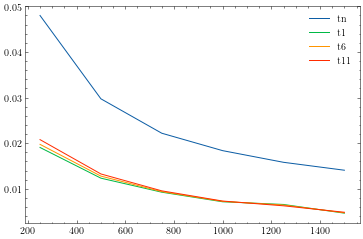

In [90]:
plt.plot(speeds, tn_damping_means, label="tn")
plt.plot(speeds, t1_damping_means, label="t1")
plt.plot(speeds, t6_damping_means, label="t6")
plt.plot(speeds, t11_damping_means, label="t11")
#plt.plot(speeds, np.array(t1_damping_means)*np.array(speeds), label="c/w")
plt.legend()
plt.show()